<a href="https://colab.research.google.com/github/euneun316/NLP-Study/blob/main/Natural%20Language%20Processing/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07.딥 러닝(Deep Learning) 개요

## 01) 퍼셉트론(Perceptron)


---

## 02) 인공 신경망(Artificial Neural Network) 훑어보기


---

## 03) 행렬곱으로 이해하는 신경망


---

## 04) 딥 러닝의 학습 방법


- 엔트로피 : 불확실한 정보량을 어떻게 표현할 것인가?! <br>
참고 : https://hyunw.kim/blog/2017/10/14/Entropy.html

- 배치크기는 보톤 2의 제곱
- default = 32
- 1000개 학습 데이터 = len(1000) 
- 학습에 쓰이는 데이터가 배치 사이즈!
    - 미니 배치로 잘라서 씀
    - 웨이트, 바이어스 만듦
    - 한번에 학습시킬 사이즈
    - 배치 개발 : 일괄 개발
    

---

## 04-3) 역전파(BackPropagation) 이해하기


---

## 05) 과적합(Overfitting)을 막는 방법들


- 강건성이 떨어진다
- 로버스터


---

## 06) 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

활성화함수를 바꿔서 기울기 소실 문제 체크

## 07) 케라스(Keras) 훑어보기

케라스는 유저가 손쉽게 딥 러닝을 구현할 수 있도록 도와주는 상위 레벨의 인터페이스로, <br>
파이썬으로 작성된 오픈 소스 신경망 라이브러리 <br>
딥 러닝을 쉽게 구현할 수 있도록 해준다 <br>
- [keras 공식문서](https://keras.io/)
- [tensorflow 공식문서](https://www.tensorflow.org/guide/keras?hl=ko)

### 1. 전처리(Preprocessing)


#### Tokenizer()
- 토큰화와 정수 인코딩을 위해 사용 <br>
- 훈련 데이터로부터 단어 집합을 생성하고, 해당 단어 집합으로 임의의 문장을 정수 인코딩하는 과정

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 훈련 데이터로부터 단어 집합 생성
# fit_on_texts() : 문자 데이터를 입력받아서 리스트의 형태로 변환
tokenizer.fit_on_texts([train_text]) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다. /말뭉치 또는 코퍼스

# 임의의 문장을 정수 인코딩
sub_text = "The earth is an great place live"        # great는 미리 토큰화되어 있지 않아서 출력 x
# texts_to_sequences() : 단어들을 시퀀스의 형태로 변환
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
# word_index() : 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = ["The earth is an awesome place live",
              "The earth is an awesome place hello"]

# 훈련 데이터로부터 단어 집합 생성
# fit_on_texts() : 문자 데이터를 입력받아서 리스트의 형태로 변환
tokenizer.fit_on_texts(train_text)

# 임의의 문장을 정수 인코딩
sub_text = ["The earth is an great place cute",
           "The earth is an great place live"]
# texts_to_sequences() : 단어들을 시퀀스의 형태로 변환
sequences = tokenizer.texts_to_sequences(sub_text)

print("정수 인코딩 : ",sequences)
# word_index() : 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [[1, 2, 3, 4, 6], [1, 2, 3, 4, 6, 7]]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7, 'hello': 8}


#### pad_sequence()
- 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움

**패딩(padding) 작업**
- 전체 훈련데이터에서 각 샘플의 길이는 서로 다를 때.
- 각 문서 또는 각 문장은 단어의 수가 제각각일 때
- 모든 샘플의 길이를 동일하게 맞춤
- 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰준다.
- 케라스에서는 pad_sequence()를 사용

**pad_sequence()**
1. 첫번째 인자 = 패딩을 진행할 데이터
2. maxlen = 모든 데이터에 대해서 정규화 할 길이
3. padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

In [21]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

### 2. 워드 임베딩(Word Embedding)

- 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다. 
- 원-핫 벡터는 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점이 있습니다. 
- 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수입니다.

|-|원-핫 벡터|임베딩 벡터|
|:--:|:--:|:--:|
|차원|고차원(단어 집합의 크기)|저차원|
|다른 표현|대부분의 값이 0이 대부분인 희소 벡터|모든 값이 실수인 밀집 벡터|
|표현 방법|수동|훈련 데이터로부터 학습함|
|값의 타입|1과 0|실수|

- 단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding) 이라고 합니다. 

- 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다.
- 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.

#### Embedding() 

- Embedding()은 단어를 밀집 벡터로 만드는 역할
- 임베딩 층(embedding layer)을 만드는 역할
- Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행
- Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 
- Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴

- 의사 코드(pseudo-code)

```python
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.
```

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이

### 3. 모델링(Modeling)

#### Sequential()
- 입력층, 은닉층, 출력층, 케라스에서는 이러한 층을 구성하기 위해 Sequential()을 사용
- Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가

- Embedding()을 통해 생성하는 임베딩 층(embedding layer)을 추가

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))

- 전결합층(fully-connected layer)을 추가 - 하이퍼 파라미터 최적화 과제 떄 해봤던 거!

In [14]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

#### Dense()
- 첫번째 인자 = 출력 뉴런의 수.
- input_dim = 입력 뉴런의 수. (입력의 차원)
- activation = 활성화 함수.
    - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
    - sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    - softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    - relu : 은닉층에 주로 사용되는 활성화 함수.

- Dense()를 사용하여 전결합층을 하나 더 추가

In [55]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

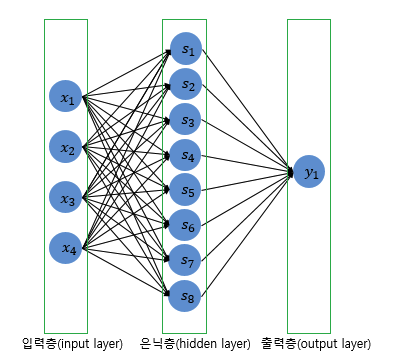

- LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있습니다. 일부는 뒤에서 배웁니다.

- summary() : 모델의 정보를 요약해서 보여줍니다.

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일(Compile)과 훈련(Training)

- RNN을 이용하여 이진 분류를 하는 전형적인 코드
- 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일을 합니다.

#### compile()
- 모델을 기계가 이해할 수 있도록 컴파일 합니다.
    - optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다.
    - loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
    - metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.

In [8]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#### fit()
- 모델을 학습합니다. 
- 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다.
    - 첫번째 인자 = 훈련 데이터에 해당됩니다.
    - 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
    - epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
    - batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

- validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

- validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다. 
- 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용합니다.

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

- verbose = 학습 중 출력되는 문구를 설정합니다.
    - 0 : 아무 것도 출력하지 않습니다.
    - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
    - 2 : 미니 배치마다 손실 정보를 출력합니다.

```bash    
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
```

```bash
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000

```

### 5. 평가(Evaluation)와 예측(Prediction)

evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가

    - 첫번째 인자 = 테스트 데이터에 해당됩니다.
    - 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
    - batch_size = 배치 크기.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.

    - 첫번째 인자 = 예측하고자 하는 데이터.
    - batch_size = 배치 크기.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

### 6. 모델의 저장(Save)과 로드(Load)

save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.

load_model() : 저장해둔 모델을 불러옵니다.

In [ ]:
model.save("model_name.h5")

In [ ]:
rom tensorflow.keras.models import load_model
model = load_model("model_name.h5")

---

## 08) 케라스의 함수형 API(Keras Functional API)

- 더욱 복잡한 모델을 생성할 수 있는 방식인 Functional API(함수형 API)

### 1. Sequential API로 만든 모델

- 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 신경망을 구현할 수 없습니다. 
- 따라서 초심자에게 적합한 API이지만, 전문가가 되기 위해서는 결과적으로 Functional API를 학습해야 합니다

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

### 2. Functional API로 만든 모델

- 각 층을 일종의 함수(function)로서 정의
- 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계
- Functional API는 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

#### 1) 전결합 피드 포워드 신경망(Fully-connected FFNN)

- 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 합니다. 

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

- Input() 함수에 입력의 크기를 정의합니다.

In [34]:
# 10개의 입력을 받는 입력층
inputs = Input(shape=(10,))

- 이전층을 다음층 함수의 입력으로 사용하고, 변수에 할당합니다.
- Model() 함수에 입력과 출력을 정의합니다.

In [36]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가
model = Model(inputs=inputs, outputs=output) # <- 새로 추가

- 이를 model로 저장하면 sequential API를 사용할 때와 마찬가지로 model.compile, model.fit 등을 사용 가능

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

- 변수명을 달리해서 FFNN을 만듦

In [39]:
# 이번에는 은닉층과 출력층의 변수를 전부 x로 통일
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

#### 2) 선형 회귀(Linear Regression)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

#### 3) 로지스틱 회귀(Logistic Regression)

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

#### 4) 다중 입력을 받는 모델(model that accepts multiple inputs)

In [ ]:
# 최종 완성된 다중 입력, 다중 출력 모델의 예
model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])

In [43]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

#### 5) RNN(Recurrence Neural Network) 은닉층 사용하기

- 하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계

In [44]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

#### 6) 다르게 보이지만 동일한 표기

In [ ]:
result = Dense(128)(input)

In [ ]:
dense = Dense(128)
result = dense(input)

---

## 09) 케라스 서브클래싱 API(Keras Subclassing API)

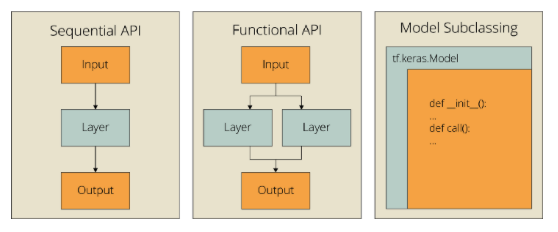

### 1. 서브클래싱 API로 구현한 선형 회귀

- Sequential API로 구현했던 선형 회귀를 Subclassing API로 구현

In [17]:
import tensorflow as tf

In [47]:
class LinearRegression(tf.keras.Model): # tf.keras.Model을 상속받음
    def __init__(self): #모델의 구조와 동적을 정의하는 생성자를 정의, 객체가 갖는 속성값을 초기화
        super(LinearRegression, self).__init__() # 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화
        self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

    def call(self, x): # 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행
        y_pred = self.linear_layer(x)
        return y_pred

In [26]:
model = LinearRegression()

In [27]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

### 2. 언제 서브클래싱 API를 써야 할까?

Sequential API : 간단한 모델을 구현하기에 적합 <br>
Functional API : Sequential API로 구현할 수 없는 복잡한 모델들을 구현가능 <br>
Subclassing API : Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있다.
- 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급
- 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없습니다.
- 대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능
- 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합

### 3. 세 가지 구현 방식 비교.

#### 1) Sequential API
- 장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.
- 단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.

#### 2) Functional API
- 장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.
- 단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

```python
# 선형 회귀 구현 코드의 일부 발췌

inputs = Input(shape=(1,)) # <-- 해당 부분
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)
```

#### 3) Subclassing API
- 장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
- 단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

---

## 10) 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기
* 다층 퍼셉트론(Multilayer Perceptron, MLP)으로 텍스트 분류를 수행

### 10.1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
![img](https://wikidocs.net/images/page/24987/mlp_final.PNG)
* 다층 퍼셉트론(MultiLayer Perceptron, MLP)
  * 단층 퍼셉트론에서 은닉층이 1개 이상 추가 된 신경망
  * 피드 포워드 신경망의 기본적인 형태
* 피드 포워드 신경망(Feed Forward Neural Network, FFNN)
  * 입력층에서 출력층으로 오직 한 방향으로 연산하는 신경망 (<-> 순환신경망)
  * 지금까지 배운 개념을 활용해 자연어 처리에 목적

### 10.2. 케라스의 texts_to_matrix() 이해하기

* 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구
* `texts_to_matrx()`의 네 가지 모드
  1. `binary`
  2. `count`
  3. `freq`
  4. `tfidf`

In [ ]:
# 토큰화와 정수 인코딩
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


#### (1) count
* 문서 단어 행렬(Document-Term Matrix, DTM)을 생성
  * BoW 기반. 순서 없음
* word_index의 결과 matrix

| 문장/토큰               | 바나나 | 먹고 | 싶은 | 사과 | 길고 | 노란 | 저는 | 과일이 | 좋아요 |
| ----------------------- | ------ | ---- | ---- | ---- | ---- | ---- | ---- | ------ | ------ |
| 먹고 싶은 사과          | 0      | 1    | 1    | 1    | 0    | 0    | 0    | 0      | 0      |
| 먹고 싶은 바나나        | 1      | 1    | 1    | 0    | 0    | 0    | 0    | 0      | 0      |
| 길고 노란 바나나 바나나 | 2      | 0    | 0    | 0    | 1    | 1    | 0    | 0      | 0      |
| 저는 과일이 좋아요      | 0      | 0    | 0    | 0    | 0    | 0    | 1    | 1      | 1      |




In [ ]:
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


#### (2) binary
* 존재 유무로만 행렬을 표현 (True / False)

In [ ]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


#### (3) tfidf
* TF-IDF (Term Frequency-Inverse Document Frequency, 단어 빈도-역 문서 빈도)
  * 빈도수 기반 단어 표현 + 중요도(가중치)
  * DTM 내에 있는 각 단어에 대한 중요도를 계산
  * TF 구현식이 기존 방식과 조금 다름

In [ ]:
# 둘째 자리까지 반올림하여 출력
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


#### (4) freq
* $\frac{단어 등장 횟수}{모든 단어의 개수}$
* 예시 '길고 노란 바나나 바나나'
  * 바나나: 2/4
  * 길고, 노란: 1/4

In [ ]:
# 둘째 자리까지 반올림하여 출력
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 10.3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해
* 사이킷런의 내장 데이터셋
* 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터
* 과제: 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것

#### (1) 데이터 확인

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# 'train'을 기재하면 훈련 데이터만 리턴 (all/train/test)
newsdata = fetch_20newsgroups(subset='train')

In [ ]:
print('데이터 속성:', *newsdata.keys()) # data, target(target_name)
print('훈련용 샘플의 개수:', len(newsdata.data))
print('총 주제의 개수: ', len(newsdata.target_names))
newsdata.target_names

데이터 속성: data filenames target_names target DESCR
훈련용 샘플의 개수: 11314
총 주제의 개수:  20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
print(newsdata.data[8])
print(newsdata.target[8], newsdata.target_names[2])

From: holmes7000@iscsvax.uni.edu
Subject: WIn 3.0 ICON HELP PLEASE!
Organization: University of Northern Iowa
Lines: 10

I have win 3.0 and downloaded several icons and BMP's but I can't figure out
how to change the "wallpaper" or use the icons.  Any help would be appreciated.


Thanx,

-Brando

PS Please E-mail me


2 comp.os.ms-windows.misc


#### (2) 데이터 EDA

In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
# non-null
print(data.info())
# unique value
print('x:', data['email'].nunique())
print('y:', data['target'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB
None
x: 11314
y: 20


target   0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
email   480  584  591  590  578  593  585  594  598  597  600  595  591  594   

target   14   15   16   17   18   19  
email   593  599  546  564  465  377  


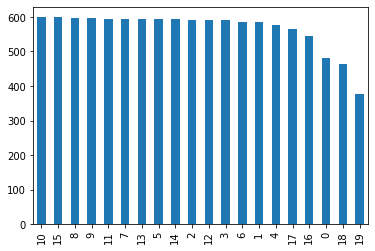

In [ ]:
# 타겟 값 분포
data['target'].value_counts().plot(kind='bar');
print(data.groupby('target').count().T)

#### (3) 데이터 Split

In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']         # train feature
train_label = data['target']        # train target
test_email = newsdata_test.data     # test feature
test_label = newsdata_test.target   # test target

In [ ]:
vocab_size = 10000  # max len
num_classes = 20

# 전처리 함수
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)            # 기준 fit
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)  # data × vocab_size
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)    # data × vocab_size
    return X_train, X_test, tokenizer.index_word

In [ ]:
# feature binary 모드로 변환
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
# target 원-핫 인코딩
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [ ]:
print('train feature:', X_train.shape)
print('train target:', y_train.shape)
print('test feature:', X_test.shape)
print('test target:', y_test.shape)

train feature: (11314, 10000)
train target: (11314, 20)
test feature: (7532, 10000)
test target: (7532, 20)


In [ ]:
print('빈도수 상위 5:',[index_to_word[i] for i in range(1, 6)])
print('빈도수 하위 5:',[index_to_word[i] for i in range(vocab_size-5, vocab_size)])

빈도수 상위 5: ['the', 'to', 'of', 'a', "'ax"]
빈도수 하위 5: ['atterlep', 'fairing', 'informative', 'nyu', 'mic']


### 10.4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

* 입력값을 바꿔가면서 모델을 여러번 호출 -> 함수 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5,
              verbose=0, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

![img](https://wikidocs.net/images/page/49071/multilayerperceptron.PNG)
* 총 4개의 층
  * vocab_size 크기(10000)의 입력층
  * 256개 뉴런의 은닉층1 (relu)
  * 128개 뉴런의 은닉층2 (relu)
  * num_classes 크기(20)의 출력층 
* 과적합 방지: 두 번의 드롭 아웃
* 다중 분류
  * 소프트 맥스 함수
  * 카테고리컬 크로스 엔트로피 (손실 함수)
* 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)


In [ ]:
# texts_to_matrix의 4가지 모드
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    # 모드에 따라서 데이터를 전처리
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    # 모델을 훈련하고 평가
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(f'{mode} 모드의 테스트 정확도: {round(score, 3)}')

binary 모드의 테스트 정확도: 0.827
count 모드의 테스트 정확도: 0.823
tfidf 모드의 테스트 정확도: 0.832
freq 모드의 테스트 정확도: 0.702


* 82% ~ 83%의 비슷한 정확도
* freq 모드에서만 정확도가 70%
* freq 모드는 이번 문제를 풀기위한 적절한 전처리 방법이 아님
---

## 11) 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

* 배경 지식
  * 과거 기계가 자연어를 학습하게 하는 방법으로 통계적인 접근을 사용
    * 통계적 언어 모델(Statistical Language Model, SLM)
  * 최근에는 인공 신경망을 사용하는 방법이 자연어 처리에서 더 좋은 성능
    * 자연어 생성(Natural Language Generation, NLG)
  * 통계적 언어 모델에서 다양한 구조의 인공 신경망을 사용한 언어 모델들로 대체

* 피드 포워드 신경망 언어 모델(Feed Forward Neural Network Language Model)
  * 신경망 언어 모델의 시초 NNLM
  * RNNLM, BiLM 등 보다 발전된 신경망 언어 모델들을 배우기 전 시초를 훑자

### 11.1. 기존 N-gram 언어 모델의 한계

* 언어 모델은 문장에 확률을 할당하는 모델
* 주어진 문맥으로부터 아직 모르는 단어를 예측하는 것을 언어 모델링이라 함
* N-gram 예시
  ```python 
  # 다음 단어 예측하기
  An adorable little boy is spreading _____
  ```
  - 바이그램 : 
      - (An adorable) 하고 little 예측,
      - (adorable little) 하고 boy 예측

  * 언어 모델링에 바로 앞 n-1개의 단어를 참고
  * 4-gram 언어 모델이라고 가정. 모델은 바로 앞 3개의 단어만 참고
  * 빈 칸 예측에 사용되는 단어는 boy, is, spreading

 
$$P(w|boy, is, spreading)=\frac{count(boy, is, spreading, w)}{count(boy, is, spreading)}$$

  * boy is spreading가 1000번, boy is spreading insults가 500번, boy is spreading smiles가 200번 등장
    * P(insults | boy is spreading) = 0.500
    * P(smiles | boy is spreading) = 0.200

* 희소 문제(sparsity problem)
  * n-gram 언어 모델은 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못함
  * boy is spreading smile라는 단어 시퀀스가 존재하지 않으면 n-gram 언어 모델에서 해당 단어 시퀀스의 확률은 0
  * 언어 모델이 판단하기에 boy is spreading 다음에는 smiles이란 단어가 나올 수 없다는 의미
  * 해당 단어 시퀀스는 현실에서 존재 가능한 시퀀스이므로 적절한 모델링이 아님

### 11.2. 단어의 의미적 유사성

* **희소 문제**는 기계가 단어의 의미적 유사성을 알수 있다면 해결할 수 있는 문제
  * `...발표 자료를 살펴보다...`
  * p(살펴보다|발표 자료를) = 0.n
  * p(훑어보다|발표 자료를) = ~0~ -> 0.m
* 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계 목표
* 코퍼스에 없는 단어에 대한 예측이라도 **유사 단어**의 시퀀스를 참고하여 예측 정확도 보정
  * **NNLM 신경망**
  * 워드 임베딩 (벡터간 유사도)

### 11.3. 피드 포워드 신경망 언어 모델(NNLM)

#### (1) 예문 : "what will the fat cat sit on"
  * 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측
  * what will the fat cat __ => sit 을 예측


#### (2) 기계가 단어를 인식할 수 있도록 모든 단어 수치화 (인코딩)
  ```python
  # 원 핫 인코딩
  what = [1, 0, 0, 0, 0, 0, 0]
  will = [0, 1, 0, 0, 0, 0, 0]
  the = [0, 0, 1, 0, 0, 0, 0]
  fat = [0, 0, 0, 1, 0, 0, 0]
  cat = [0, 0, 0, 0, 1, 0, 0]
  sit = [0, 0, 0, 0, 0, 1, 0]
  on = [0, 0, 0, 0, 0, 0, 1]
  ```
  * NNLM의 입력이면서 예측을 위한 레이블
  * what will the fat cat 입력 => sit 예측

#### (3) NNLM 훈련
  * NNLM은 정해진 개수(**window**)의 단어만을 참고하여 예측 (n-gram과 동일)
  
  ![img](https://wikidocs.net/images/page/45609/nnlm1.PNG)
  * 4개의 단어 입력 => 다중 클래스 예측(오차 발생) => 학습(손실 함수에 따라 parameter 조정)
  * Input Layer (입력층)
    * 윈도우 4, 원 핫 인코딩 입력
  * Projection Layer (투사층)
  
  ![img](https://wikidocs.net/images/page/45609/nnlm2_renew.PNG)
    * fat을 의미하는 원-핫 벡터 X fat
    * W (가중치)
      * 단어 집합의 크기 V(7), 투사층의 크기 M(5)
      * 투사층: 가중치 행렬과의 곱셈은 이루어지지만 활성화 함수가 존재하지 않음
      * 룩업 테이블: 원-핫 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일
    * 룩업 테이블 과정을 거친 임베딩 벡터 e fat
      * 임베딩 벡터: 초기 랜덤한 값을 가지지만 학습 과정에서 값이 변경되는 벡터
    * 각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결(concatenate) 
    
    ![img](https://wikidocs.net/images/page/45609/nnlm3_renew.PNG)
  * Hidden Layer (은닉층)
    * 은닉층의 입력은 가중치 곱해진 후 편향이 더해져 활성화 함수의 입력
  * Output Layer (출력층)

    ![img](https://wikidocs.net/images/page/45609/nnlm5_final.PNG)
    * 은닉층의 출력은 V의 크기
    * 출력층 활성화 함수: 소프트맥스(softmax)
      * 벡터의 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1
    * 손실 함수: 크로스 엔트로피(cross-entropy) 함수
      * 역전파를 통해 가중치 행렬(투사층 + 은닉층)들이 학습

#### (4) 의의
* 만약 충분한 훈련 데이터가 있다면? 
  * 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습
  * 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻음
  * 훈련이 끝난 후 다음 단어를 예측 과정에서 훈련 코퍼스에서 없던 단어 시퀀스라 하더라도 다음 단어를 선택이 가능

* 단어 간 유사도를 구하는 임베딩 벡터의 아이디어
  * Word2Vec, FastText, GloVe 등으로 발전
  * 워드 임베딩 챕터에서 자세히 다룸

### 11.4. NNLM의 이점과 한계
* NNLM은 기존 n-gram 언어 모델의 한계를 개선

#### (1) 이점: 기존 모델에서의 개선점
1. NNLM은 단어를 표현하기 위해 **임베딩 벡터**를 사용하므로서 **단어의 유사도**를 계산
2. 이를 통해 희소 문제(sparsity problem)를 해결

#### (2) 고정된 길이의 입력(Fixed-length input)
* n-gram과 같이 정해진 n개의 단어만을 참고 (window)
* 한계를 극복할 수 있는 언어 모델 존재
  * RNN(Recurrent Neural Network) 언어 모델
---